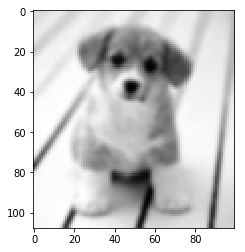

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import filters

# Load image:
input_pixels = np.array(rgb2gray(imread('resources/puppy.jpg'))*256, dtype=np.uint8)
im2 = filters.gaussian_filter(input_pixels, 1)
plt.imshow(im2, cmap="gray")

# window_size = 5
# dy, dx = np.gradient(input_pixels)
# Ixx = dx**2
# Ixy = dy*dx
# Iyy = dy**2

# height = input_pixels.shape[0]
# width = input_pixels.shape[1]

# input_pixels_copy = np.copy(input_pixels)

# offset = window_size/2
# cornerList = []

# for y in range(offset, height-offset):
#         for x in range(offset, width-offset):
#             #Calculate sum of squares
#             windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
#             windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
#             windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
#             Sxx = windowIxx.sum()
#             Sxy = windowIxy.sum()
#             Syy = windowIyy.sum()

#             #Find determinant and trace, use to get corner response
#             det = (Sxx * Syy) - (Sxy**2)
#             trace = Sxx + Syy
#             r = det - 0.04*(trace**2)

#             #If corner response is over threshold, color the point and add to corner list
#             if r > 10000:
#                 cornerList.append([x, y, r])
# #                 color_img.itemset((y, x, 0), 0)
# #                 color_img.itemset((y, x, 1), 0)
# #                 color_img.itemset((y, x, 2), 255)
                

